In [89]:
!pip install numpy


In [91]:
!pip install tensorflow==2.15

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0)
ERROR: No matching distribution found for tensorflow==2.15


In [92]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [93]:
!pip install tensorflow==2.15

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0)
ERROR: No matching distribution found for tensorflow==2.15


In [94]:
!pip install tensorflow

In [95]:
import tensorflow as tf

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.datasets.mnist import load_data
from keras.utils import to_categorical
from tensorflow.keras.models import Model

In [97]:
(x_train,y_train),(x_test,y_test)=load_data()
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [98]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)
print(x_train.shape)
print(x_test.shape)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [99]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [100]:
geometric=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=13,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.8,1.2]
)

In [101]:
geo_augmented_images=np.array([geometric.random_transform(img) for img in x_train[:50000]])
geo_augmented_labels=y_train[:50000]
print(len(geo_augmented_images))


50000


In [102]:
print(len(x_train))


60000


In [103]:
augmented_x_train=np.concatenate([
    x_train,
    geo_augmented_images
])

augmented_y_train=np.concatenate([
    y_train,
    geo_augmented_labels
])

In [104]:
print(len(augmented_x_train))
print(len(augmented_y_train))

110000
110000


In [105]:
geo_augmented_images_test=np.array([geometric.random_transform(img) for img in x_test[:5000]])
geo_augmented_labels_test=y_test[:5000]

In [106]:
augmented_x_test=np.concatenate([
    x_test,
    geo_augmented_images_test
])
augmented_y_test=np.concatenate([
    y_test,
    geo_augmented_labels_test
])

In [107]:
print(len(augmented_x_test))
print(len(augmented_y_test))

15000
15000


In [113]:
print(augmented_x_test.shape)
print(augmented_x_train.shape)
print(augmented_y_test.shape)
print(augmented_y_train.shape)

(15000, 28, 28, 1)
(110000, 28, 28, 1)
(15000, 10)
(110000, 10)


In [110]:
len(augmented_x_train)

110000

Text(0.5, 1.0, '5')

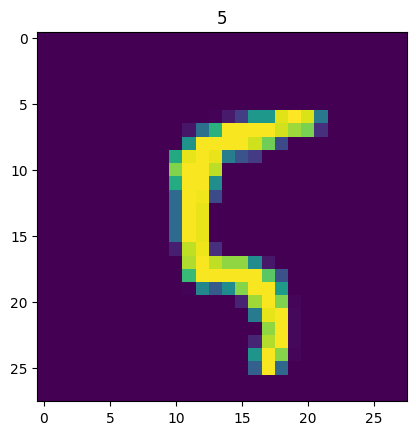

In [114]:
plt.imshow(augmented_x_train[100])
plt.title(f'{np.argmax(augmented_y_train[100])}')

In [115]:
augmented_x_train=augmented_x_train/255
augmented_x_test=augmented_x_test/255
x_train=x_train/255
x_test=x_test/255



In [116]:
print(augmented_x_train.shape)
print(augmented_x_test.shape)
print(augmented_y_train.shape)
print(augmented_y_test.shape)

(110000, 28, 28, 1)
(15000, 28, 28, 1)
(110000, 10)
(15000, 10)


## model create


In [120]:
inputs=Input((28,28,1))
x=Conv2D(filters=32,kernel_size=(3,3),activation='relu',strides=(1,1))(inputs)
x=MaxPooling2D()(x)
x=Conv2D(filters=64,kernel_size=(3,3),activation='relu',strides=(1,1))(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
x=Dense(64,activation='relu')(x)
output=Dense(10,activation='softmax')(x)
model=Model(inputs,output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
print('Augmented Train Data Shape :',augmented_x_train.shape)
print('Augmented Test Data Shape :',augmented_x_test.shape)



Augmented Train Data Shape : (110000, 28, 28, 1)
Augmented Test Data Shape : (15000, 28, 28, 1)


In [124]:
model.compile(optimizer=keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
)

In [125]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2,callbacks=[early_stop])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7400 - loss: 0.9365 - val_accuracy: 0.9536 - val_loss: 0.1657
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9530 - loss: 0.1586 - val_accuracy: 0.9680 - val_loss: 0.1110
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9682 - loss: 0.1063 - val_accuracy: 0.9744 - val_loss: 0.0863
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9750 - loss: 0.0832 - val_accuracy: 0.9777 - val_loss: 0.0788
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9799 - loss: 0.0681 - val_accuracy: 0.9776 - val_loss: 0.0717
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9829 - loss: 0.0558 - val_accuracy: 0.9814 - val_loss: 0.0622
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9843 - loss: 0.0528 - val_accuracy: 0.9837 - val_loss: 0.0570
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9854 - loss: 0

Text(0, 0.5, 'loss')

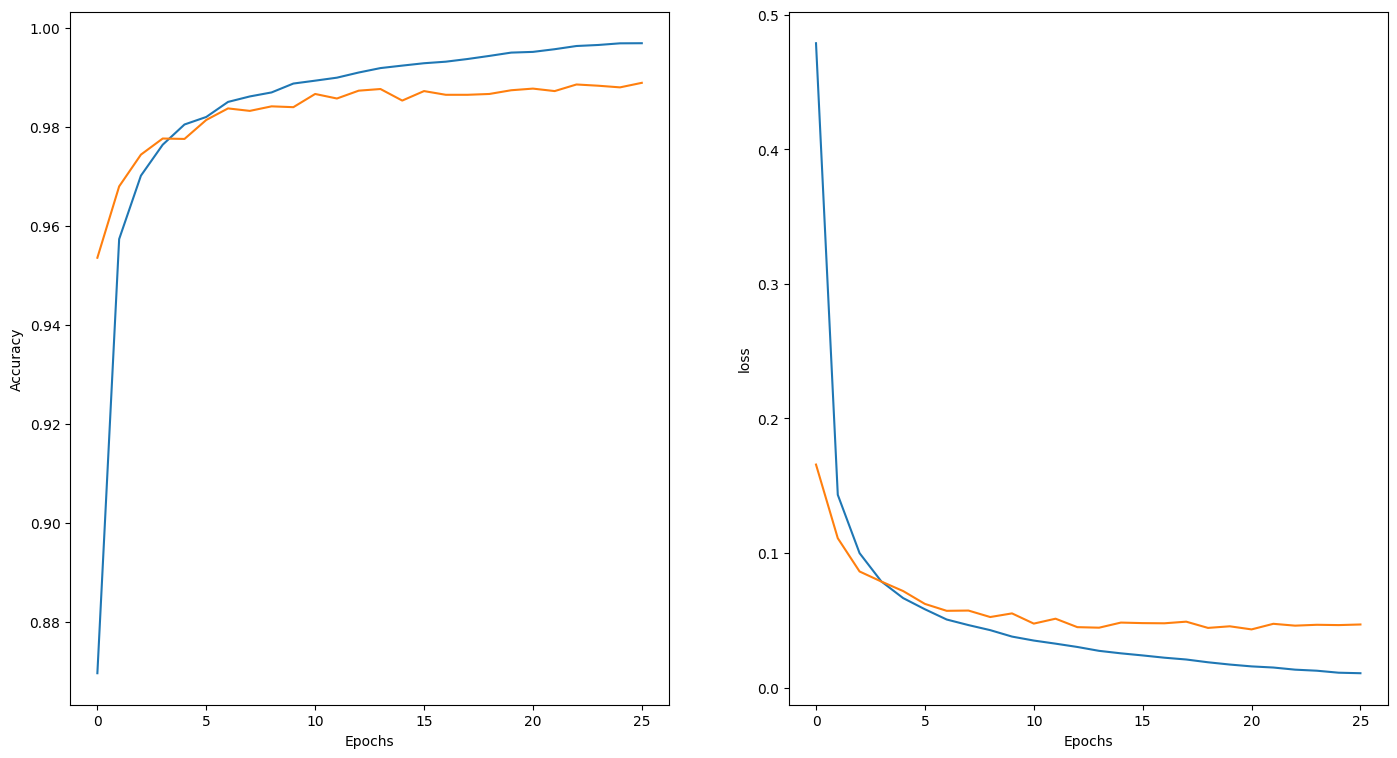

In [128]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')


In [129]:
inputs=Input((28,28,1))
x=Conv2D(filters=32,kernel_size=(3,3),activation='relu',strides=(1,1))(inputs)
x=MaxPooling2D()(x)
x=Conv2D(filters=64,kernel_size=(3,3),activation='relu',strides=(1,1))(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
x=Dense(64,activation='relu')(x)
output=Dense(10,activation='softmax')(x)
augmented_model=Model(inputs,output)
augmented_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
augmented_model.compile(optimizer=keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history1=augmented_model.fit(augmented_x_train,augmented_y_train,epochs=50,validation_split=0.2,callbacks=[early_stop])

Epoch 1/50
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6894 - loss: 1.0578 - val_accuracy: 0.7262 - val_loss: 0.8727
Epoch 2/50
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9014 - loss: 0.3267 - val_accuracy: 0.8006 - val_loss: 0.6564
Epoch 3/50
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9279 - loss: 0.2396 - val_accuracy: 0.8350 - val_loss: 0.5433
Epoch 4/50
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9390 - loss: 0.1980 - val_accuracy: 0.8485 - val_loss: 0.4953
Epoch 5/50
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9482 - loss: 0.1696 - val_accuracy: 0.8672 - val_loss: 0.4328


Text(0, 0.5, 'loss')

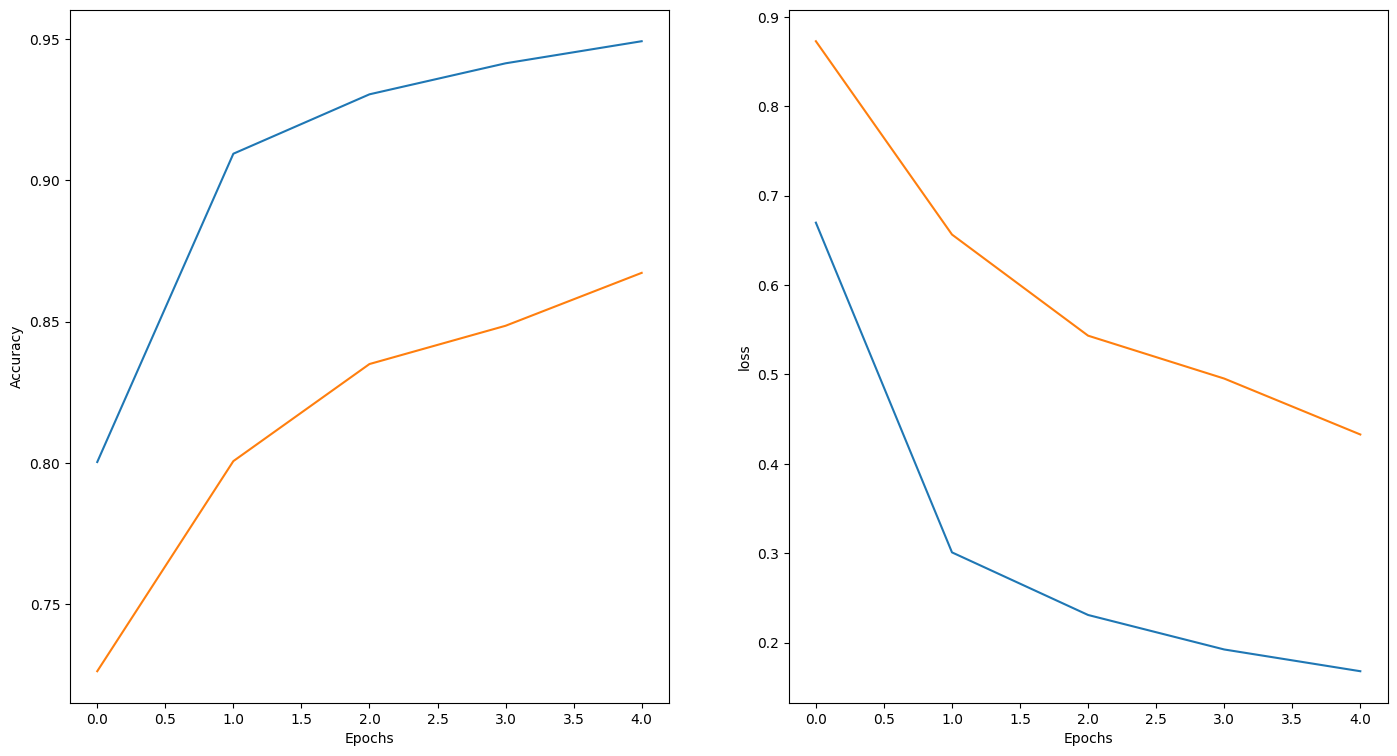

In [133]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')


In [137]:
loss,accuracy=model.evaluate(x_test,y_test)
loss3,accuracy3=model.evaluate(augmented_x_test,augmented_y_test)

loss2,accuracy2=augmented_model.evaluate(x_test,y_test)
loss2,accuracy1=augmented_model.evaluate(augmented_x_test,augmented_y_test)
print(accuracy)
print(accuracy3)

print(accuracy2)
print(accuracy1)
                                        


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.0416
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9558 - loss: 0.2906
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0588
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9744 - loss: 0.0823
0.989300012588501
0.8245999813079834
0.9847000241279602
0.9422666430473328


In [147]:
import pandas as pd
from tabulate import tabulate

data = {
    'original_data': [
        f'{accuracy*100: .2f}%',
        f'{accuracy3*100: .2f}%'
],
     'augmented_data': [
        f'{accuracy2*100: .2f}%'
        f'{accuracy1*100: .2f}%'
    ]
}
#creating the Dataframe
df=pd.DataFrame(data,index=['Original Model','Augmented Model'])
print(tabulate(df,headers='keys',tablefmt='fancy_grid'))

ModuleNotFoundError: No module named 'tabulate'

In [140]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 3.1 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.5 MB 3.2 MB/s eta 0:00:03
   ---------- ----------------------------- 3.1/11.5 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.5 MB 3.5 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.5 MB 3.3 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.5 MB 3.5 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.5 MB 3.6 MB/s eta 0:00:02
   ------------------------ --------------- 7.1/11.5 MB 3.6 MB/s eta 0:00:02
   ---------------------------- ----------- 8.1/11.5 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 9.2/11.5 MB 3.8 MB/s eta 0:00:01
   ----------